In [1]:
# 在小型数据集上训练卷积神经网络
# 使用 https://www.kaggle.com/c/dogs-vs-cats/data 数据集

# 准备数据,从25000张猫狗图片中,取出每类各包含1000张图片的训练集,500张图片的验证集,500张图片的测试集
# kaggle competitions download -c dogs-vs-cats

# 注意,tensorflow 2 版本使用的keras语法与keras不同
# 以下代码适用于 tensorflow 2

# 准备小型数据集
import os, shutil

original_dataset_dir =  r'D:/dogs-vs-cats' # 原始文件目录

base_dir = r'D:/cats_and_dogs_small' # 目标目录
os.mkdir(base_dir)

# 建立训练\验证\测试目录,区分猫\狗
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


# 复制文件
def copy_file(src_path, dst_path, fname):
    src = os.path.join(src_path, fname)
    dst = os.path.join(dst_path, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    copy_file(original_dataset_dir, train_cats_dir, fname)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    copy_file(original_dataset_dir, validation_cats_dir, fname)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    copy_file(original_dataset_dir, test_cats_dir, fname)


fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    copy_file(original_dataset_dir, train_dogs_dir, fname)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    copy_file(original_dataset_dir, validation_dogs_dir, fname)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    copy_file(original_dataset_dir, test_dogs_dir, fname)


In [8]:
# 模型设置
# tensorflow 2.0 版本,需要如下写法
from tensorflow.keras import models
from tensorflow.keras import layers

# 层设置
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 将 3D 张量展平为 1D
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# 卷积神经网络的输入格式固定为 (image_height, image_width, image_channels)
# Conv2D/MaxPooling2D 的输出都是 (height, width, channels) 格式的 3D 张量

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [9]:
# 编译模型
from tensorflow.keras import optimizers

# 设置
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['accuracy'])

In [10]:
# 数据预处理
# 需要安装 PILLOW 包
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 图像乘以1/255缩放
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [11]:
# 训练并保存模型
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)
model.save('cats_vs_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 7s 65ms/step - loss: 0.6910 - accuracy: 0.5315 - val_loss: 0.6767 - val_accuracy: 0.6060
Epoch 2/30
100/100 [==============================] - 7s 65ms/step - loss: 0.6587 - accuracy: 0.6155 - val_loss: 0.6527 - val_accuracy: 0.6150
Epoch 3/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6336 - accuracy: 0.6510 - val_loss: 0.6589 - val_accuracy: 0.5900
Epoch 4/30
100/100 [==============================] - 6s 64ms/step - loss: 0.5900 - accuracy: 0.7000 - val_loss: 0.6139 - val_accuracy: 0.6710
Epoch 5/30
100/100 [==============================] - 6s 64ms/step - loss: 0.5512 - accuracy: 0.7165 - val_loss: 0.6018 - val_accuracy: 0.6630
Epoch 6/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5246 - accuracy: 0.7395 - val_loss: 0.6282 - val_accuracy: 0.6660
Epoch 7/30
100/100 [==============================] - 6s 63ms/step - loss: 0.4877 - accuracy: 0.7655 - val_loss: 0.6052 - val_accuracy: 0.6770

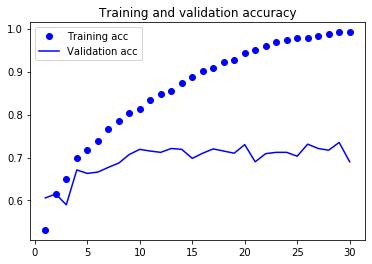

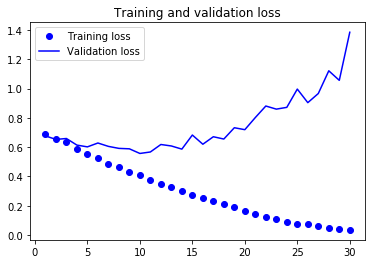

In [13]:
import matplotlib.pyplot as plt

# 图形化对比训练集和验证集上的精度
# 可以看到数据过拟合;第5轮之后验证损失基本不变
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] #accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



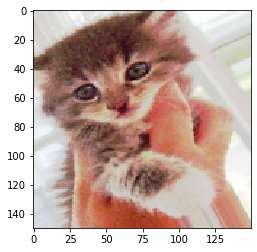

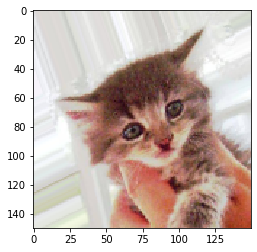

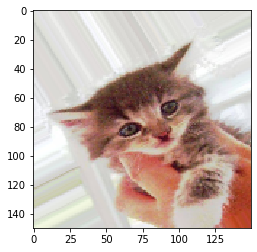

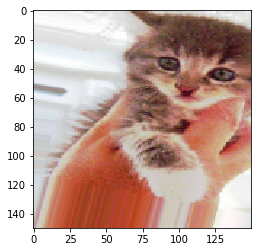

In [1]:
# 使用数据增强方式，提升准确率
import matplotlib.pyplot as plt
import os, shutil

base_dir = r'D:/cats_and_dogs_small' # 目标目录
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range = 40, # 随机旋转的角度值,0~180
      width_shift_range = 0.2, # 水平平移范围(占宽度的比例)
      height_shift_range = 0.2, # 垂直平移范围(占高度的比例)
      shear_range = 0.2, # 随机错切变换的角度
      zoom_range = 0.2, # 随即缩放的范围
      horizontal_flip = True, # 随机将一半图像翻转
      fill_mode = 'nearest') # 用于填充新创建像素的方法
      
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img) # 转换为 (150, 150, 3) 形状的 Numpy 数组

x = x.reshape((1,) + x.shape) # 转换为 (1, 150, 150, 3)

# .flow() 将无限循环,生成随机变换后的图像,故下面 break 跳出
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [2]:
# 添加dropout,降低过拟合
# 因为原始图片数量较少,使用数据增强方式仍不能完全消除过拟合
# 模型设置
from tensorflow.keras import models
from tensorflow.keras import layers

# 层设置
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 将 3D 张量展平为 1D
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # 随即抛弃50%
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# 卷积神经网络的输入格式固定为 (image_height, image_width, image_channels)
# Conv2D/MaxPooling2D 的输出都是 (height, width, channels) 格式的 3D 张量

model.summary()

# 编译模型
from tensorflow.keras import optimizers
# 设置优化器等
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [3]:
# 使用数据增强生成器训练并保存模型
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255) # 注意,不能增强验证数据

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

# 训练并保存模型
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)
model.save('cats_vs_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 30s 304ms/step - loss: 0.6939 - accuracy: 0.5114 - val_loss: 0.6846 - val_accuracy: 0.5038
Epoch 2/100
100/100 [==============================] - 21s 206ms/step - loss: 0.6806 - accuracy: 0.5622 - val_loss: 0.6574 - val_accuracy: 0.6155
Epoch 3/100
100/100 [==============================] - 21s 208ms/step - loss: 0.6652 - accuracy: 0.6026 - val_loss: 0.6404 - val_accuracy: 0.6263
Epoch 4/100
100/100 [==============================] - 20s 198ms/step - loss: 0.6570 - accuracy: 0.6021 - val_loss: 0.6219 - val_accuracy: 0.6472
Epoch 5/100
100/100 [==============================] - 20s 198ms/step - loss: 0.6386 - accuracy: 0.6364 - val_loss: 0.6262 - val_accuracy: 0.6580
Epoch 6/100
100/100 [==============================] - 22s 222ms/step - loss: 0.6165 - accuracy: 0.6536 - val_loss: 0.5887 - val_accuracy: 0.6656
Epoch 7/100
100/100 [===================

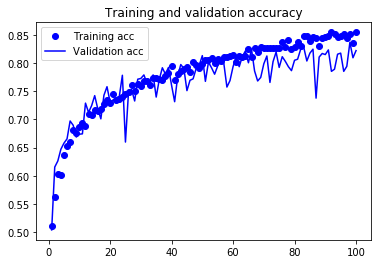

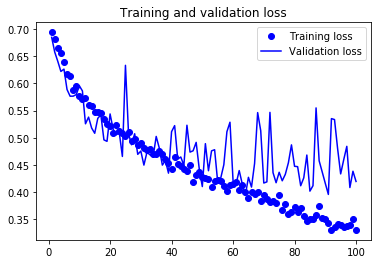

In [4]:
import matplotlib.pyplot as plt

# 图形化对比训练集和验证集上的精度
# 精度达到82%,相较最初有较大提升
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] #accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()